<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/202014048_Evaluation2_CSE442/202014048_prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/202014048_Evaluation2_CSE442/Party%20Dataset.csv')
data.replace(('yes', 'no'), (1, 0), inplace=True)

In [103]:
print(data.head())
print(data.describe())
print(data.info())

   Number_of_Guests  Party_Duration_Hours  Music_Volume_dB  Party_Success
0                10                   3.0               80              1
1                20                   4.0               85              1
2                 5                   2.0               70              0
3                15                   3.0               75              1
4                25                   5.0               90              1
       Number_of_Guests  Party_Duration_Hours  Music_Volume_dB  Party_Success
count         10.000000             10.000000        10.000000      10.000000
mean          14.100000              3.350000        80.800000       0.700000
std            6.983313              1.028753         8.189424       0.483046
min            5.000000              2.000000        68.000000       0.000000
25%            8.500000              2.625000        75.750000       0.250000
50%           13.500000              3.250000        81.000000       1.000000
75%       

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
null_counts=data.isnull().sum()

null_counts

Number_of_Guests        0
Party_Duration_Hours    0
Music_Volume_dB         0
Party_Success           0
dtype: int64

In [106]:
data_cleaned=data.dropna()

In [107]:
X=data_cleaned[['Number_of_Guests','Party_Duration_Hours','Music_Volume_dB']]
y = data_cleaned['Party_Success']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test_scaled)

In [112]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE", mse)
print("R2", r2)

MSE 0.07055465419765705
R2 0.7177813832093718


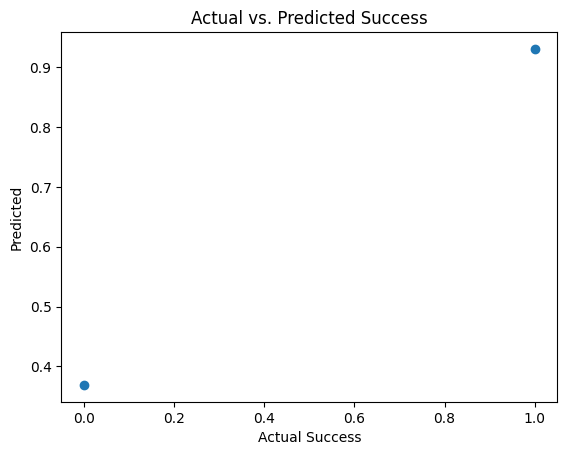

In [113]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Success')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Success')
plt.show()


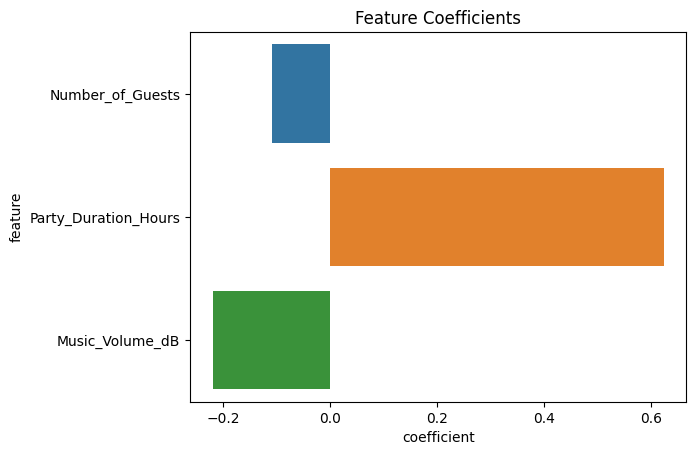

In [114]:
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Feature Coefficients')
plt.show()

In [115]:
quelist = [[20,4,75]]

quedf = pd.DataFrame(quelist, columns=['Number_of_Guests','Party_Duration_Hours','Music_Volume_dB'])
print(quedf)
quescaled = scaler.transform(quedf)
print(quescaled)

   Number_of_Guests  Party_Duration_Hours  Music_Volume_dB
0                20                     4               75
[[ 0.86554468  0.59215653 -0.95699221]]


In [116]:
que_pred = model.predict(quescaled)
print("Party Success=",que_pred)
print("predicted Party Success=Yes")

Party Success= [1.23499491]
predicted Party Success=Yes
